<a href="https://colab.research.google.com/github/AYUSH123ak/CSN361/blob/master/Zomato_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

To address our analysis, we need to respond to the subsequent inquiries:


*  Do a greater number of restaurants provide online delivery as opposed to
offline services?

*  What price range is preferred by couples for their dinner at restaurants?
*  Which types of restaurants are the most favored by the general public?




Import useful Libraries



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Read csv file using read_csv

In [2]:
df=pd.read_csv('/content/Zomato_data.csv')
print(df.head())

                    name online_order book_table   rate  votes  \
0                  Jalsa          Yes        Yes  4.1/5    775   
1         Spice Elephant          Yes         No  4.1/5    787   
2        San Churro Cafe          Yes         No  3.8/5    918   
3  Addhuri Udupi Bhojana           No         No  3.7/5     88   
4          Grand Village           No         No  3.8/5    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


In [50]:
df.describe()

,votes,approx_cost(for two people)
count,148.000000,148.000000
mean,264.810811,418.243243
std,653.676951,223.085098
min,0.000000,100.000000
25%,6.750000,200.000000
50%,43.500000,400.000000
75%,221.750000,600.000000
max,4884.000000,950.000000


In [5]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


Text(0.5, 0, 'Restaurant Type')

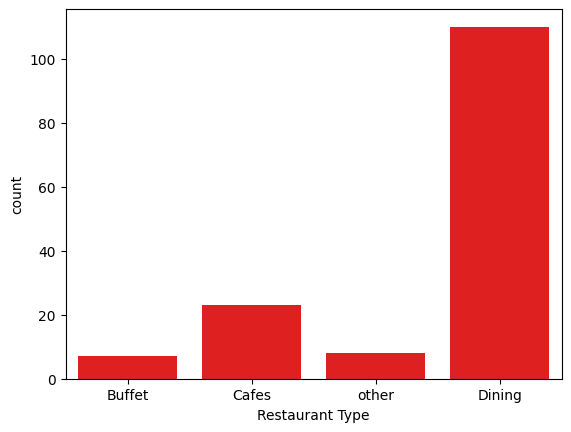

In [7]:
sns.countplot(x=df['listed_in(type)'],color='red')
plt.xlabel('Restaurant Type')

Conclusion : The majority comes from Dining

Text(0, 0.5, 'Votes')

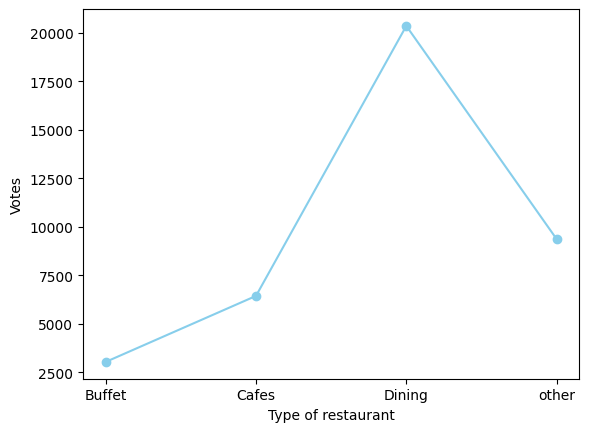

In [25]:
canva=df.groupby('listed_in(type)')['votes'].sum()
zomat=pd.DataFrame({'votes': canva})
plt.plot(zomat, c='skyblue', marker='o')
plt.xlabel('Type of restaurant', c='black', size=10)
plt.ylabel('Votes', c='black', size=10)

Conclusion: Dining restaurants are preferred by a larger number of individuals.

Now we will determine the restaurant’s name that received the maximum votes based on a given dataframe.

In [27]:
max_votes=df['votes'].max()

rest_with_max_votes=df.loc[df['votes']==max_votes,'name']
print(rest_with_max_votes)


38    Empire Restaurant
Name: name, dtype: object


<Axes: xlabel='online_order', ylabel='count'>

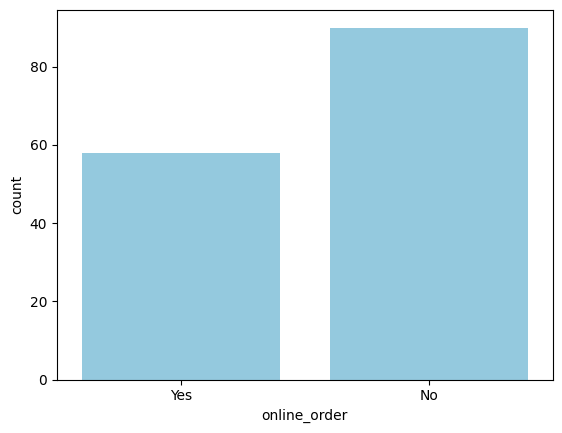

In [31]:
sns.countplot(x=df['online_order'],color='skyblue')

In [51]:
def handleRate(value):
    value=str(value).split('/')
    value=value[0];
    return float(value)

df['rate']=df['rate'].apply(handleRate)
print(df.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


Conclusion: This suggests that a majority of the restaurants do not accept online orders.

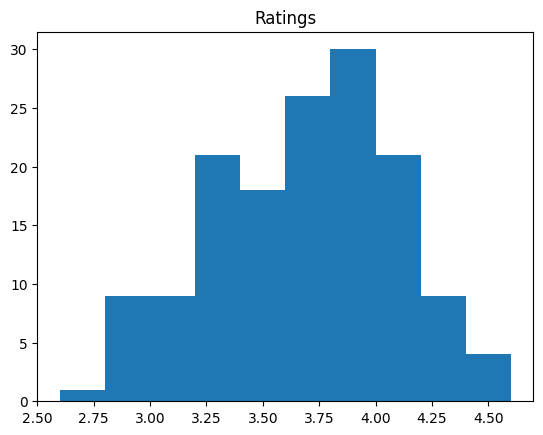

In [52]:
plt.hist(df['rate'],bins=10)
plt.title('Ratings')
plt.show()

In [53]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


Text(0.5, 0, 'Approx cost')

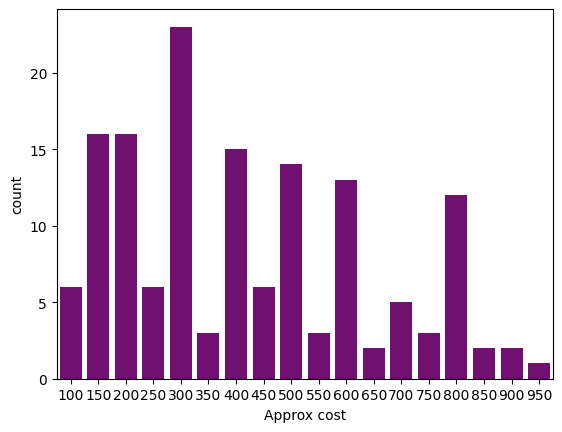

In [54]:
sns.countplot(x=df['approx_cost(for two people)'],color='purple')
plt.xlabel('Approx cost')

Conclusion: The majority of couples prefer restaurants with an approximate cost of 300 rupees.



<Axes: xlabel='online_order', ylabel='rate'>

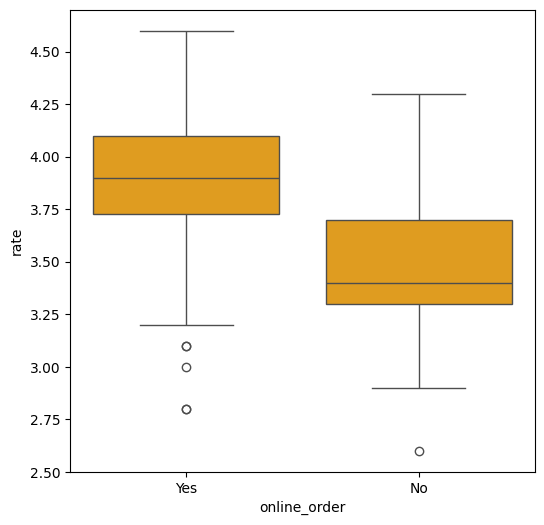

In [55]:
plt.figure(figsize=(6,6))
sns.boxplot(x=df['online_order'],y=df['rate'],color='orange')

CONCLUSION: Offline orders received lower ratings in comparison to online orders, which obtained excellent ratings.

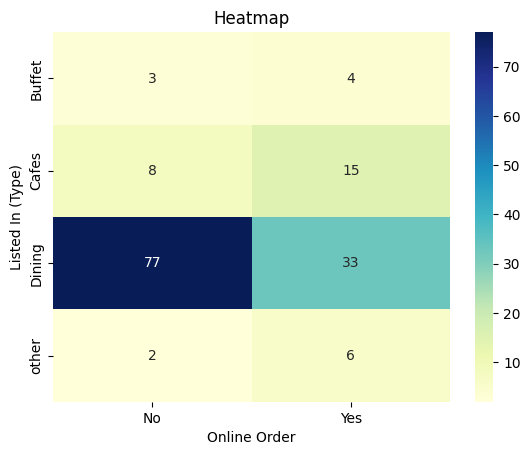

In [56]:
pivot = df.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sns.heatmap(pivot, annot=True, cmap='YlGnBu')
plt.title('Heatmap')
plt.xlabel('Online Order')
plt.ylabel('Listed In (Type)')
plt.show()

#

CONCLUSION: Dining restaurants primarily accept offline orders, whereas cafes primarily receive online orders. This suggests that clients prefer to place orders in person at restaurants, but prefer online ordering at cafes.